In [13]:
import pandas as pd     
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns           
from sklearn.model_selection import train_test_split             
from sklearn.ensemble import RandomForestClassifier      
from sklearn.metrics import classification_report 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix  

In [14]:
df = pd.read_csv('Train.csv')
df.drop("ID", axis = 1, inplace = True)
df.index = range(1, len(df) + 1)
df

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
1,D,Flight,4,2,177,3,low,F,44,1233,1
2,F,Flight,4,5,216,2,low,M,59,3088,1
3,A,Flight,2,2,183,4,low,M,48,3374,1
4,B,Flight,3,3,176,4,medium,M,10,1177,1
5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...
10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10997,C,Ship,5,4,242,5,low,F,4,1155,0
10998,F,Ship,5,2,223,6,medium,M,2,1210,0


In [15]:
df.columns

Index(['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

In [16]:
missing_values = df.isnull().sum()
missing_values

Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [67]:
df = pd.get_dummies(df, drop_first=True).astype(int)
df.head()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_low,Product_importance_medium,Gender_M
1,4,2,177,3,44,1233,1,0,0,1,0,0,0,1,0,0
2,4,5,216,2,59,3088,1,0,0,0,1,0,0,1,0,1
3,2,2,183,4,48,3374,1,0,0,0,0,0,0,1,0,1
4,3,3,176,4,10,1177,1,1,0,0,0,0,0,0,1,1
5,2,2,184,3,46,2484,1,0,1,0,0,0,0,0,1,0


In [69]:
x = df.drop('Reached.on.Time_Y.N', axis=1)
y = df['Reached.on.Time_Y.N']

In [71]:
x

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_low,Product_importance_medium,Gender_M
1,4,2,177,3,44,1233,0,0,1,0,0,0,1,0,0
2,4,5,216,2,59,3088,0,0,0,1,0,0,1,0,1
3,2,2,183,4,48,3374,0,0,0,0,0,0,1,0,1
4,3,3,176,4,10,1177,1,0,0,0,0,0,0,1,1
5,2,2,184,3,46,2484,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10995,4,1,252,5,1,1538,0,0,0,0,0,1,0,1,0
10996,4,1,232,5,6,1247,1,0,0,0,0,1,0,1,0
10997,5,4,242,5,4,1155,0,1,0,0,0,1,1,0,0
10998,5,2,223,6,2,1210,0,0,0,1,0,1,0,1,1


In [73]:
y

1        1
2        1
3        1
4        1
5        1
        ..
10995    1
10996    0
10997    0
10998    0
10999    0
Name: Reached.on.Time_Y.N, Length: 10999, dtype: int32

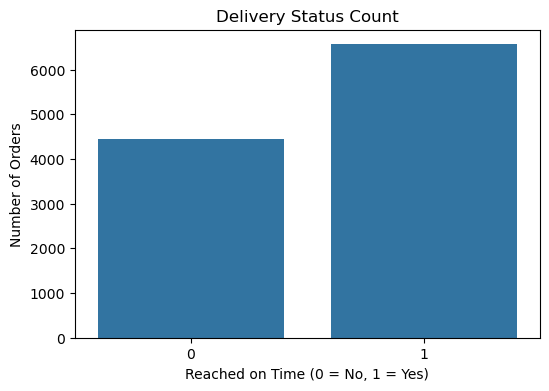

In [84]:
#visualizing the data: Delivery status
plt.figure(figsize=(6,4))
sns.countplot(x='Reached.on.Time_Y.N', data=df)
plt.title('Delivery Status Count')
plt.xlabel('Reached on Time (0 = No, 1 = Yes)')
plt.ylabel('Number of Orders')
plt.show()

<Axes: xlabel='Mode_of_Shipment', ylabel='count'>

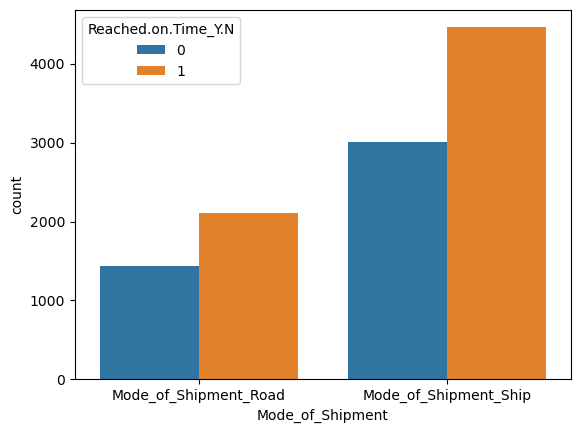

In [86]:
#visualizing the on time delivery data
df['Mode_of_Shipment'] = df[['Mode_of_Shipment_Road', 'Mode_of_Shipment_Ship']].idxmax(axis=1)
sns.countplot(x='Mode_of_Shipment', hue='Reached.on.Time_Y.N', data=df)

In [88]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=70)
model = RandomForestClassifier(random_state=70, class_weight='balanced')
model.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=70)

In [90]:
y_pred = model.predict(x_test)
#evaluating it
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:",accuracy)
con_mat = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", con_mat)
class_rep =  classification_report(y_test, y_pred)
print("\nClassification Report:\n",class_rep)

Accuracy: 0.6645454545454546

Confusion Matrix:
 [[600 298]
 [440 862]]

Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.67      0.62       898
           1       0.74      0.66      0.70      1302

    accuracy                           0.66      2200
   macro avg       0.66      0.67      0.66      2200
weighted avg       0.68      0.66      0.67      2200

